# DAT 205 Project - Transform data
## By Dennis Hung
## Version 1
## Code DRAFT 2021-03-27

## Code Strucuture
### Section 0: Function definitions
### Section 1: Import libraries
### Section 2: Configuration of variables

### Section 3: Load the dataset from file and initial analysis
#### Section 3.1: Load the dataset from file
#### Section 3.2: Initial Analysis

### Section 4: Transforming/cleansing the data 
#### Section 4.1: Enhance the data
#### Prepare data enhancement attributes in dataframe (df_TF) and create UID
#### Create new TeamGameStats dataframe to aggregate data by UID_STG
### Section 4.2:  NBA Advanced Stat - PIE (Player Impact Efficiency)
### Section 4.3:  NBA Advanced Stat - PER (Player Efficiency Rating)
### Section 4.4 Filter data by Team (if specified)
### Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features
### Section 4.6: Transform categorical feature (WL) using value replace
### Section 4.7: Transform categorical features using LabelEncoder
### Using OneHotEncoding (Not Working)
### Section 4.8: Define TARGET variable and separate into dataframes by season type

## Section 5: Analysis - Heat Maps / Correlation Matrices
### Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs
### Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix
### Section 5.3: Re-check Heat Map / Correlation Matrix

## Section 6: Modeling and Analysis
### Section 6.1: Prepare train and test data
### Section 6.2: Apply Logistic Regression on the split train/test dataset
### Section 6.3: Apply Decision Tree Classifier on the split train/test dataset
### Section 6.4: Apply Random Forest Classifier on the split train/test dataset

## Section 7: Cross Validation Scores

## Section 8: Summary Report

## End of Code




##  Reference

#### How to Get NBA Data Using the nba_api Python Module (Beginner). Retrieved from Plyaing Numbers: 

https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/

#### Patel, S. (2020, August 19). swar / nba_api. Retrieved from GitHub: 

https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

#### Issues

https://github.com/swar/nba_api/issues/124



# Note: 
#### This code relies on the CSV output from "DAT 205-Group01-NBA-HistPlayGameLogs.ipynb" as the dataset for this transformation.

# Section 0: Function definitions

hms_string(sec_elapsed)


In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60))/60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h,m,s)

# Null field analysis
def nullFieldAnalysis(df):
    df_missingDataInfo = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
    #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
    null_threshold = 0 
    print("")
    print("")
    print("==== Null value analysis ====")
    return df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

# CalcThreshold_List
def CalcThreshold_List(totalRecords):
    CTL_10 = int(round(totalRecords*0.1,0))
    CTL_20 = int(round(totalRecords*0.2,0))
    CTL_30 = int(round(totalRecords*0.3,0))
    CTL_40 = int(round(totalRecords*0.4,0))
    CTL_50 = int(round(totalRecords*0.5,0))
    CTL_60 = int(round(totalRecords*0.6,0))
    CTL_70 = int(round(totalRecords*0.7,0))
    CTL_80 = int(round(totalRecords*0.8,0))
    CTL_90 = int(round(totalRecords*0.9,0))
    CTL_100 = int(round(totalRecords*1,0))

    CTL_05 = int(round(totalRecords*0.05,0))
    CTL_15 = int(round(totalRecords*0.15,0))
    CTL_25 = int(round(totalRecords*0.25,0))
    CTL_35 = int(round(totalRecords*0.35,0))
    CTL_45 = int(round(totalRecords*0.45,0))
    CTL_55 = int(round(totalRecords*0.55,0))
    CTL_65 = int(round(totalRecords*0.65,0))
    CTL_75 = int(round(totalRecords*0.75,0))
    CTL_85 = int(round(totalRecords*0.85,0))
    CTL_95 = int(round(totalRecords*0.95,0))

    Threshold_List = [1, CTL_05, CTL_10, CTL_15, CTL_20, CTL_25, CTL_30, CTL_35, CTL_40, CTL_45, 
                    CTL_50, CTL_55, CTL_60, CTL_65, CTL_70, CTL_75, CTL_80, CTL_85, 
                    CTL_90, CTL_95, CTL_100]
    return Threshold_List


# Section 1: Import libraries

In [2]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv
import time

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format



start_time = time.time()

# Section 2: Configuration of variables

Must manually set the following variables

gameTypeListed as one of the following: 'Pre Season', 'Regular Season', 'Playoffs'

seasonsListed for the game season in this format '2015-16'. Have at least 2 values

In [3]:

# General configuration
debug_active = 'yes'
loop_max = 100
# showNumRecs = 15
numFormat = '{:.4f}'
numFormat_Pct = "{:.0%}"

# Data Transformation 'yes' or other
dataEnhancement_active = 'yes'
# dataEnhancement_active = 'no'
    
# Section 3.1: Load the dataset from file
# pick who is running the code and comment out the others
# coder = 'bhavika'
# coder = 'cindy'
coder = 'dennis'

# Setup file name for csv or Excel (.xlsx)
if coder == 'bhavika':
    filename = 'D:/McMaster/DAT205/Capstone/Data/HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
elif coder == 'dennis':
    # filename = './HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
    # filename = './DAT205_Output_Enhanced_df_TF 2004-2020.csv'
    # Test Data files
    filename = './HistoricalGameLogs_2007-08_to_2008-09_ALL.csv'
    # filename = './DAT205_Output_Enhanced_df_TF 2007-09.csv'
    

# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'


# Section 4.4 Filter data by Team (if specified)
# Filter the dataset by team or None
allTeamsList = ['CLE', 'LAC', 'NOH', 'WAS', 'ORL', 'NJN', 'PHX', 'DET', 'IND', \
       'CHA', 'DAL', 'ATL', 'NYK', 'CHI', 'BOS', 'MIN', 'PHI', 'HOU', \
       'POR', 'TOR', 'SAC', 'UTA', 'GSW', 'MIA', 'SEA', 'MEM', 'LAL', \
       'SAS', 'DEN', 'MIL', 'NOK', 'ZAK', 'CHN', 'PAN', 'RMA', 'MMT', \
       'MTA', 'MAL', 'LRO', 'EPT', 'OKC', 'LRY', 'BAR', 'MOS', 'OLP', \
       'PAR', 'LAB', 'MAC', 'MLN', 'BKN', 'FCB', 'RMD', 'MPS', 'EAM', \
       'ALB', 'FBU', 'NOP', 'UBB', 'FLA', 'BAU', 'FEN', 'SLA', 'SDS', \
       'BNE', 'MEL', 'SYD', 'GUA', 'PER', 'ADL', 'NZB', 'BJD', 'FRA']
# teamSelected = 'None'
teamSelected = 'TOR'

# Section 6: Modeling and Analysis
random_state_val = 42

# Section 6.1: Prepare train and test data
# Select a season 
gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
gameTypeListed_code = [0, 1, 2]
gameTypeToProcess = 1
test_size_val = 0.30

# Section 5: Analysis - Heat Maps / Correlation Matrices
plotSize = (20,15)




# # TEST CODE
# # Option 1: For all currently possible seasons
# # seasonsListed = ['1946-47', '1947-48', '1948-49', '1949-50'
# # , '1950-51', '1951-52', '1952-53', '1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59', '1959-60'
# # , '1960-61', '1961-62', '1962-63', '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69', '1969-70'
# # , '1970-71', '1971-72', '1972-73', '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79', '1979-80'
# # , '1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90'
# # , '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00'
# # , '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# # , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'
# # , '2020-21']

# seasonsListed = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

# seasonStart = seasonsListed[0]
# seasonEnd = seasonsListed[-1]

# # Request info for each season in the list
# df_gamelogs_player = []
# countFirstYear = 0

# Section 3: Load the dataset from file and initial analysis

## Section 3.1: Load the dataset from file

In [4]:
# load the CSV or Excel file 
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code

# lst of column names which needs to be string
lst_str_cols = ['GAME_ID']
# use dictionary comprehension to make dict of dtypes
dict_dtypes = {x : 'str'  for x in lst_str_cols}
# use dict on dtypes
df = pd.read_csv(filename, dtype=dict_dtypes)
# Excel file import
# df = pd.read_excel(filename)




# Remove duplicate index from import
unwanted_list = ['Unnamed: 0']

X_headers_list = df.columns.tolist()
for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df_Initial = df[X_headers_list]

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Initial)
    # Examine shape of dataframe
    display(df_Initial.shape)
    # Examine the type of attributes in the dataframe
    print("Shape of the dataset")
    df_Initial.info()
    # Describe the numerical data
    df_Initial.describe()
    


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type
0,2007-08,200759,Cedric Simmons,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,0,0,0,2,0,0,-10,0,0,Pre Season
1,2007-08,1088,Chucky Atkins,1610612743,DEN,Denver Nuggets,0010700106,2007-10-25T00:00:00,DEN @ PHX,L,...,0,0,0,0,0,2,0,0,0,Pre Season
2,2007-08,201191,JamesOn Curry,1610612741,CHI,Chicago Bulls,0010700109,2007-10-25T00:00:00,CHI vs. MIL,W,...,0,0,0,1,0,0,4,0,0,Pre Season
3,2007-08,1956,Ira Newble,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,0,0,0,0,0,0,-2,0,0,Pre Season
4,2007-08,2743,Kris Humphries,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,1,0,0,4,2,11,23,0,0,Pre Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58283,2008-09,200796,Leon Powe,1610612738,BOS,Boston Celtics,0040800111,2009-04-18T00:00:00,BOS vs. CHI,L,...,0,0,0,2,6,8,-10,0,0,Playoffs
58284,2008-09,1888,Richard Hamilton,1610612765,DET,Detroit Pistons,0040800101,2009-04-18T00:00:00,DET @ CLE,L,...,0,0,0,1,2,15,-19,0,0,Playoffs
58285,2008-09,703,Kurt Thomas,1610612759,SAS,San Antonio Spurs,0040800161,2009-04-18T00:00:00,SAS vs. DAL,L,...,1,0,0,1,0,0,-9,0,0,Playoffs
58286,2008-09,101112,Channing Frye,1610612757,POR,Portland Trail Blazers,0040800171,2009-04-18T00:00:00,POR vs. HOU,L,...,0,0,0,4,1,4,-15,0,0,Playoffs


(58288, 35)

Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58288 entries, 0 to 58287
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        58288 non-null  object 
 1   PLAYER_ID          58288 non-null  int64  
 2   PLAYER_NAME        58093 non-null  object 
 3   TEAM_ID            58288 non-null  int64  
 4   TEAM_ABBREVIATION  58288 non-null  object 
 5   TEAM_NAME          58288 non-null  object 
 6   GAME_ID            58288 non-null  object 
 7   GAME_DATE          58288 non-null  object 
 8   MATCHUP            58288 non-null  object 
 9   WL                 58239 non-null  object 
 10  MIN                58288 non-null  float64
 11  FGM                58288 non-null  int64  
 12  FGA                58288 non-null  int64  
 13  FG_PCT             58288 non-null  float64
 14  FG3M               58288 non-null  int64  
 15  FG3A               58288 non-null  int64  
 16  F

## Section 3.2: Initial Analysis

In [5]:
# Display the headers of columns that use descriptive or non-numerical values
categorical_Features = df_Initial.dtypes[df_Initial.dtypes == "object"].index.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    print("VALIDATION CODE")
    print(categorical_Features)

# Describe the categorical data
print("")
print("")
print("==== Description of the categorical features ====")
display(df_Initial[categorical_Features].describe())

# # Null field analysis
nullFieldAnalysis(df_Initial)
# # Null field analysis
# df_missingDataInfo = pd.DataFrame({'Count': df_Initial.isnull().sum(), 'Percent': 100*df_Initial.isnull().sum()/len(df)})

# #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
# null_threshold = 0 
# print("")
# print("")
# print("==== Null value analysis ====")
# df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

VALIDATION CODE
['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']


==== Description of the categorical features ====


,SEASON_YEAR,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,Game_Type
count,58288,58093,58288,58288,58288,58288,58288,58239,58288
unique,2,638,43,43,2847,457,1890,2,3
top,2007-08,Kobe Bryant,LAL,Los Angeles Lakers,0010700007,2009-01-02T00:00:00,UTA @ LAL,W,Regular Season
freq,29259,221,2330,2330,33,304,137,29190,49515




==== Null value analysis ====


,Count,Percent
WL,49,0.084065
PLAYER_NAME,195,0.334546


# 

# Section 4: Transforming/cleansing the data 

## Data cleansing of nulls (Not working)

## Correction to missing PreSeason games WL values only 

49 PreSeason records 

2007-08 
GAME_ID 0010700072 / 2007-10-19
BOS vs NJN   W 36 to L 33

2008-09 
GAME_ID 0010800035 / 2008-10-11
DEN vs PHX   W 77 to L 72
Note some player game data seems missing

## Corrected missing player name data

740 records (727 preseason and 13 regular season)

This is not important as the player names are excluded from the analysis



In [6]:
# # df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].loc[df_missingDataInfo[]]

# missingDataInfo_List = df_missingDataInfo.loc[df_missingDataInfo['Count']>0].index.tolist()
# # ['PLAYER_NAME', 'WL']

# numOfRows = len(df_missingDataInfo.index)

# for missingDataInfo_Value in missingDataInfo_List:
#     df_missingDataInfo[df_missingDataInfo[index] = missingDataInfo_Value]


# # Pull player data
# from nba_api.stats.static import players
# player_dict = players.get_players()


# # Use ternary operator or write function 
# # Names are case sensitive
# bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
# bron_id = bron['id']

# # find team Ids
# from nba_api.stats.static import teams 
# teams = teams.get_teams()
# GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
# GSW_id = GSW['id']

## Section 4.1: Enhance the data

In [7]:
# Setup variables for data transformation
df_TF = df_Initial
totalNumRec = df_TF.shape[0]

# Check df_TeamGameStats
# VALIDATION CODE 
if debug_active == 'yes':
    print(totalNumRec)
    display(df_TF)
    print(df_TF.columns)

58288


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type
0,2007-08,200759,Cedric Simmons,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,0,0,0,2,0,0,-10,0,0,Pre Season
1,2007-08,1088,Chucky Atkins,1610612743,DEN,Denver Nuggets,0010700106,2007-10-25T00:00:00,DEN @ PHX,L,...,0,0,0,0,0,2,0,0,0,Pre Season
2,2007-08,201191,JamesOn Curry,1610612741,CHI,Chicago Bulls,0010700109,2007-10-25T00:00:00,CHI vs. MIL,W,...,0,0,0,1,0,0,4,0,0,Pre Season
3,2007-08,1956,Ira Newble,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,0,0,0,0,0,0,-2,0,0,Pre Season
4,2007-08,2743,Kris Humphries,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,1,0,0,4,2,11,23,0,0,Pre Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58283,2008-09,200796,Leon Powe,1610612738,BOS,Boston Celtics,0040800111,2009-04-18T00:00:00,BOS vs. CHI,L,...,0,0,0,2,6,8,-10,0,0,Playoffs
58284,2008-09,1888,Richard Hamilton,1610612765,DET,Detroit Pistons,0040800101,2009-04-18T00:00:00,DET @ CLE,L,...,0,0,0,1,2,15,-19,0,0,Playoffs
58285,2008-09,703,Kurt Thomas,1610612759,SAS,San Antonio Spurs,0040800161,2009-04-18T00:00:00,SAS vs. DAL,L,...,1,0,0,1,0,0,-9,0,0,Playoffs
58286,2008-09,101112,Channing Frye,1610612757,POR,Portland Trail Blazers,0040800171,2009-04-18T00:00:00,POR vs. HOU,L,...,0,0,0,4,1,4,-15,0,0,Playoffs


Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type'],
      dtype='object')


### Prepare data enhancement attributes in dataframe (df_TF) and create UID 

In [8]:
if dataEnhancement_active == 'yes':
    # Add columns for
    #   UID_STG for SEASON_YEAR', 'TEAM_ID', 'GAME_ID'
    #   PIE for Performance Impact Efficiency
    #   PER for Player Efficieny Rating

    addFieldInTFList = ['UID_STG', 'PIE', 'PER']
    for addField in addFieldInTFList:
        df_TF[addField] = 'new field'

    # Reference to sum column values under certain condition.
    # https://intellipaat.com/community/49/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas
    # https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/  
    # https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

    # # TEST CODE
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'] + str(df_TF['TEAM_ID'] +  df_TF['GAME_ID'])
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'])
    # df_TF['PIE'] = df_TF['PIE'].map(lambda df_TF['PIE']: df_TF['SEASON_YEAR'])

    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time01 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0

    for currNumRec in range(totalNumRec):
        df_TF['UID_STG'].loc[currNumRec] = df_TF['SEASON_YEAR'].loc[currNumRec] + str(df_TF['TEAM_ID'].loc[currNumRec]) +  df_TF['GAME_ID'].loc[currNumRec]
        
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took01 = time.time() - start_time01
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took01), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TF)

Data enhancement

Total Records  58288

% Completed | Duration (hh:mm:ss) | Record #
     0.0    |    0:00:00.01     |    1
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
     5.0    |    0:00:01.12     |    2914
     10.0    |    0:00:02.26     |    5829
     15.0    |    0:00:03.41     |    8743
     20.0    |    0:00:04.50     |    11658
     25.0    |    0:00:05.61     |    14572
     30.0    |    0:00:06.73     |    17486
     35.0    |    0:00:07.76     |    20401
     40.0    |    0:00:08.86     |    23315
     45.0    |    0:00:09.85     |    26230
     50.0    |    0:00:10.83     |    29144
     55.0    |    0:00:11.92     |    32058
     60.0    |    

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,UID_STG,PIE,PER
0,2007-08,200759,Cedric Simmons,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,2,0,0,-10,0,0,Pre Season,2007-0816106127390010700104,new field,new field
1,2007-08,1088,Chucky Atkins,1610612743,DEN,Denver Nuggets,0010700106,2007-10-25T00:00:00,DEN @ PHX,L,...,0,0,2,0,0,0,Pre Season,2007-0816106127430010700106,new field,new field
2,2007-08,201191,JamesOn Curry,1610612741,CHI,Chicago Bulls,0010700109,2007-10-25T00:00:00,CHI vs. MIL,W,...,1,0,0,4,0,0,Pre Season,2007-0816106127410010700109,new field,new field
3,2007-08,1956,Ira Newble,1610612739,CLE,Cleveland Cavaliers,0010700104,2007-10-25T00:00:00,CLE @ TOR,L,...,0,0,0,-2,0,0,Pre Season,2007-0816106127390010700104,new field,new field
4,2007-08,2743,Kris Humphries,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,4,2,11,23,0,0,Pre Season,2007-0816106127610010700104,new field,new field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58283,2008-09,200796,Leon Powe,1610612738,BOS,Boston Celtics,0040800111,2009-04-18T00:00:00,BOS vs. CHI,L,...,2,6,8,-10,0,0,Playoffs,2008-0916106127380040800111,new field,new field
58284,2008-09,1888,Richard Hamilton,1610612765,DET,Detroit Pistons,0040800101,2009-04-18T00:00:00,DET @ CLE,L,...,1,2,15,-19,0,0,Playoffs,2008-0916106127650040800101,new field,new field
58285,2008-09,703,Kurt Thomas,1610612759,SAS,San Antonio Spurs,0040800161,2009-04-18T00:00:00,SAS vs. DAL,L,...,1,0,0,-9,0,0,Playoffs,2008-0916106127590040800161,new field,new field
58286,2008-09,101112,Channing Frye,1610612757,POR,Portland Trail Blazers,0040800171,2009-04-18T00:00:00,POR vs. HOU,L,...,4,1,4,-15,0,0,Playoffs,2008-0916106127570040800171,new field,new field


### Create new TeamGameStats dataframe to aggregate data by UID_STG

This is used by PIE

In [9]:
if dataEnhancement_active == 'yes':
    # Create dataframe of team game stats
    TeamGameStats_List = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3', 'PIE_Bottom']

    # df_TeamGameStats = pd.DataFrame(data, index=index, columns=columns)
    df_TeamGameStats = pd.DataFrame(df_TF['UID_STG'].unique(), columns = ['UID_STG'])

    for TeamGameStat in TeamGameStats_List:
        df_TeamGameStats[TeamGameStat] = ''

# if dataEnhancement_active == 'yes':
    # Populate the dataframe with TeamGameStats for currNumRec in range(totalNumRec):
    totalNumRec_TGS = df_TeamGameStats.shape[0]

    TeamGameStat_List = df_TeamGameStats['UID_STG'].tolist()
    Threshold_List_TGS = CalcThreshold_List(totalNumRec_TGS)
    start_time02 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec_TGS)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    # for currTeamGameStat in TeamGameStat_List:  
    for currNumRec2 in range(totalNumRec_TGS):    
        # Pull UID_STG from df_TeamGameStats 
        currTeamGameUID = df_TeamGameStats['UID_STG'].loc[currNumRec2]
        # Filter df_TF by UID_STG and create temp dataframe for this data
        df_TF_Temp = []
        df_TF_Temp = df_TF[df_TF['UID_STG']==currTeamGameUID]
        # Input in to df_TeamGameStats row with the following calculations for 
        # 'SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 
        # 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK',
        # 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3'
        df_TeamGameStats['SEASON_YEAR'].loc[currNumRec2] = df_TF_Temp['SEASON_YEAR'].unique()[0]
        df_TeamGameStats['TEAM_ABBREVIATION'].loc[currNumRec2] = df_TF_Temp['TEAM_ABBREVIATION'].unique()[0]
        df_TeamGameStats['Game_Type'].loc[currNumRec2] = df_TF_Temp['Game_Type'].unique()[0]
        df_TeamGameStats['GmFGM'].loc[currNumRec2] = df_TF_Temp['FGM'].sum()
        df_TeamGameStats['GmFGA'].loc[currNumRec2] = df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG_PCT'].loc[currNumRec2] = df_TF_Temp['FGM'].sum() / df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG3M'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum()
        df_TeamGameStats['GmFG3A'].loc[currNumRec2] = df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFG3_PCT'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum() / df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFTM'].loc[currNumRec2] = df_TF_Temp['FTM'].sum()
        df_TeamGameStats['GmFTA'].loc[currNumRec2] = df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmFT_PCT'].loc[currNumRec2] = df_TF_Temp['FTM'].sum() / df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmOREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum()
        df_TeamGameStats['GmDREB'].loc[currNumRec2] = df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum() + df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmAST'].loc[currNumRec2] = df_TF_Temp['AST'].sum()
        df_TeamGameStats['GmTOV'].loc[currNumRec2] = df_TF_Temp['TOV'].sum()
        df_TeamGameStats['GmSTL'].loc[currNumRec2] = df_TF_Temp['STL'].sum()
        df_TeamGameStats['GmBLK'].loc[currNumRec2] = df_TF_Temp['BLK'].sum()
        df_TeamGameStats['GmBLKA'].loc[currNumRec2] = df_TF_Temp['BLKA'].sum()
        df_TeamGameStats['GmPF'].loc[currNumRec2] = df_TF_Temp['PF'].sum()
        df_TeamGameStats['GmPFD'].loc[currNumRec2] = df_TF_Temp['PFD'].sum()
        df_TeamGameStats['GmPTS'].loc[currNumRec2] = df_TF_Temp['PTS'].sum()
        df_TeamGameStats['GmPLUS_MINUS'].loc[currNumRec2] = df_TF_Temp['PLUS_MINUS'].sum() / 5
        df_TeamGameStats['GmDD2'].loc[currNumRec2] = df_TF_Temp['DD2'].sum()
        df_TeamGameStats['GmTD3'].loc[currNumRec2] = df_TF_Temp['TD3'].sum()
        
        # PIE_Bottom 
        PIE_Bottom = (df_TeamGameStats['GmPTS'].loc[currNumRec2] + df_TeamGameStats['GmFGM'].loc[currNumRec2] + df_TeamGameStats['GmFTM'].loc[currNumRec2] \
        - df_TeamGameStats['GmFGA'].loc[currNumRec2] - df_TeamGameStats['GmFTA'].loc[currNumRec2] \
        + df_TeamGameStats['GmDREB'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmOREB'].loc[currNumRec2]) \
        + df_TeamGameStats['GmAST'].loc[currNumRec2] + df_TeamGameStats['GmSTL'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmBLK'].loc[currNumRec2]) \
        - df_TeamGameStats['GmPF'].loc[currNumRec2] - df_TeamGameStats['GmTOV'].loc[currNumRec2])
        # Insert calculated value into dataframe
        df_TeamGameStats['PIE_Bottom'].loc[currNumRec2] = PIE_Bottom
        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List_TGS:
            currPctCompleted = round((currNumRecord / totalNumRec_TGS) *100,1)
            time_took02 = time.time() - start_time02
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took02), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

Data enhancement

Total Records  5694

% Completed | Duration (hh:mm:ss) | Record #
     0.0    |    0:00:00.02     |    1
     5.0    |    0:00:02.62     |    285
     10.0    |    0:00:05.14     |    569
     15.0    |    0:00:07.79     |    854
     20.0    |    0:00:10.32     |    1139
     25.0    |    0:00:12.76     |    1424
     30.0    |    0:00:15.30     |    1708
     35.0    |    0:00:17.86     |    1993
     40.0    |    0:00:20.39     |    2278
     45.0    |    0:00:22.92     |    2562
     50.0    |    0:00:25.46     |    2847
     55.0    |    0:00:28.00     |    3132
     60.0    |    0:00:31.23     |    3416
     65.0    |    0:00:34.93     |    3701
     70.0    |    0:00:38.12     |    3986
     75.0    |    0:00:41.29     |    4270
     80.0    |    0:00:44.33     |    4555
     85.0    |    0:00:47.52     |    4840
     90.0    |    0:00:50.63     |    5125
     95.0    |    0:00:53.75     |    5409
     100.0    |    0:00:56.81     |    5694


,UID_STG,SEASON_YEAR,TEAM_ABBREVIATION,Game_Type,GmFGM,GmFGA,GmFG_PCT,GmFG3M,GmFG3A,GmFG3_PCT,...,GmSTL,GmBLK,GmBLKA,GmPF,GmPFD,GmPTS,GmPLUS_MINUS,GmDD2,GmTD3,PIE_Bottom
0,2007-0816106127390010700104,2007-08,CLE,Pre Season,28,68,0.411765,3,16,0.1875,...,6,4,3,24,28,78,-33,0,0,42.5
1,2007-0816106127430010700106,2007-08,DEN,Pre Season,38,85,0.447059,3,18,0.166667,...,9,3,4,25,35,113,-3,0,0,69
2,2007-0816106127410010700109,2007-08,CHI,Pre Season,38,77,0.493506,8,19,0.421053,...,10,8,3,25,22,97,16,0,0,83
3,2007-0816106127610010700104,2007-08,TOR,Pre Season,40,85,0.470588,9,18,0.5,...,14,3,4,28,24,111,33,0,0,108.5
4,2007-0816106127560010700106,2007-08,PHX,Pre Season,42,88,0.477273,9,25,0.36,...,6,4,3,35,25,116,3,1,0,90.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,2008-0916106127570040800171,2008-09,POR,Playoffs,35,84,0.416667,1,11,0.0909091,...,4,3,6,23,21,81,-27,0,0,35
5690,2008-0916106127450040800171,2008-09,HOU,Playoffs,38,65,0.584615,8,21,0.380952,...,5,6,3,21,23,108,27,0,0,108
5691,2008-0916106127590040800161,2008-09,SAS,Playoffs,38,81,0.469136,11,14,0.785714,...,2,0,3,20,17,97,-8,0,0,72
5692,2008-0916106127380040800111,2008-09,BOS,Playoffs,39,99,0.393939,4,16,0.25,...,8,7,10,20,26,103,-2,0,0,72.5


In [10]:
if dataEnhancement_active == 'yes':
    columnsToDropFrom_TGS = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M' \
    , 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL' \
    , 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3']

    for dropColumn_TGS in columnsToDropFrom_TGS:
        del df_TeamGameStats[dropColumn_TGS]

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

,UID_STG,PIE_Bottom
0,2007-0816106127390010700104,42.5
1,2007-0816106127430010700106,69
2,2007-0816106127410010700109,83
3,2007-0816106127610010700104,108.5
4,2007-0816106127560010700106,90.5
...,...,...
5689,2008-0916106127570040800171,35
5690,2008-0916106127450040800171,108
5691,2008-0916106127590040800161,72
5692,2008-0916106127380040800111,72.5


## Section 4.2:  NBA Advanced Stats 

#### PIE (Player Impact Estimate)

Definition PIE measures a player's overall statistical contribution against the total statistics in games they play in. PIE yields results which are comparable to other advanced statistics (e.g. PER) using a simple formula.

Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)


#### PER (Player Efficiency Rating)

In [11]:
# TEST CODE

# currNumRec = 4
# PIE_Top = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
#         - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
#         + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
#         + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
#         - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])

# Ref_UID_STG_Value = df_TF['UID_STG'].loc[currNumRec]   

# df_currTGSs = df_TeamGameStats[df_TeamGameStats['UID_STG']==Ref_UID_STG_Value]

# PIE_Bottom = df_currTGSs.iloc[0]['PIE_Bottom']
# # PIE_Bottom = (df_currTGSs['GmPTS'] + df_currTGSs['GmFGM'] + df_currTGSs['GmFTM'] \
# #         - df_currTGSs['GmFGA'] - df_currTGSs['GmFTA'] \
# #         + df_currTGSs['GmDREB'] + (0.5 * df_currTGSs['GmOREB']) \
# #         + df_currTGSs['GmAST'] + df_currTGSs['GmSTL'] + (0.5 * df_currTGSs['GmBLK']) \
# #         - df_currTGSs['GmPF'] - df_currTGSs['GmTOV'])
# PIE_Calc = PIE_Top / PIE_Bottom

# # df_TF['PIE'].loc[currNumRec] = PIE_Calc

# print("PIE_Top = ", PIE_Top)
# print(Ref_UID_STG_Value)
# display(df_currTGSs)

# print("PIE_Bottom = ", PIE_Bottom)
# print("PIE =", PIE_Calc)

In [12]:
if dataEnhancement_active == 'yes':
    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time03 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    for currNumRec in range(totalNumRec):
        # Calculates PIE
        # PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

        PIE_Top = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
            - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
            + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
            + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
            - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])
        # Get the UID_STG from the Player record df_TF
        Ref_UID_STG_Value = df_TF['UID_STG'].loc[currNumRec]   

        df_currTGSs = df_TeamGameStats[df_TeamGameStats['UID_STG']==Ref_UID_STG_Value]
        PIE_Bottom = df_currTGSs.iloc[0]['PIE_Bottom']
        PIE = PIE_Top / PIE_Bottom * 100
        df_TF['PIE'].loc[currNumRec] = PIE

        # # Calculates PER
        # # PER=[ FGM x 85.910 + Steals x 53.897+ 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190 + Assists x 34.677
        # #            + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190- TO x 53.897 ] x (1 / Minutes)
        # PER=[ FGM x 85.910 + Steals x 53.897+ 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190 + Assists x 34.677
        #            + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190- TO x 53.897 ] x (1 / Minutes)
        if df_TF['MIN'].loc[currNumRec] == 0:
            PER = 0
        else:
            FT_Miss = df_TF['FTA'].loc[currNumRec] - df_TF['FTM'].loc[currNumRec]
            FG_Miss = df_TF['FGA'].loc[currNumRec] - df_TF['FGM'].loc[currNumRec]
            
            PER = (df_TF['FGM'].loc[currNumRec] * 85.910 + df_TF['STL'].loc[currNumRec] * 53.897 \
            + df_TF['FG3M'].loc[currNumRec] * 51.757 + df_TF['FTM'].loc[currNumRec] * 46.845 \
            + df_TF['BLK'].loc[currNumRec] * 39.190 + df_TF['OREB'].loc[currNumRec] * 39.190 \
            + df_TF['AST'].loc[currNumRec] * 34.677 + df_TF['DREB'].loc[currNumRec] * 14.707 \
            - df_TF['PF'].loc[currNumRec] * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190 \
            - df_TF['TOV'].loc[currNumRec] * 53.897) / df_TF['MIN'].loc[currNumRec]

        df_TF['PER'].loc[currNumRec] = PER


        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took03 = time.time() - start_time03
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took03), "    |   ", currNumRecord)

Data enhancement

Total Records  58288

% Completed | Duration (hh:mm:ss) | Record #
     0.0    |    0:00:00.00     |    1
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
     5.0    |    0:00:06.18     |    2914
     10.0    |    0:00:12.50     |    5829
     15.0    |    0:00:18.41     |    8743
     20.0    |    0:00:24.31     |    11658
     25.0    |    0:00:30.70     |    14572
     30.0    |    0:00:36.66     |    17486
     35.0    |    0:00:42.82     |    20401
     40.0    |    0:00:49.22     |    23315
     45.0    |    0:00:55.09     |    26230
     50.0    |    0:01:01.12     |    29144
     55.0    |    0:01:07.08     |    32058
     60.0    |    

## Section 4.3:  NBA Advanced Stat - PER (Player Efficiency Rating)

In [13]:
# if dataEnhancement_active == 'yes':
#     Threshold_List = CalcThreshold_List(totalNumRec)
#     start_time04 = time.time()
#     print("==========================")
#     print("Data enhancement")
#     print("==========================")
#     print("")
#     print("Total Records ", totalNumRec)
#     print("")
#     print("% Completed | Duration (hh:mm:ss) | Record #")
#     currNumRecord = 0
#     start_time04 = time.time()
#     for currNumRec in range(totalNumRec):
#         # PER=[ FGM x 85.910 + Steals x 53.897+ 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190 + Assists x 34.677
#         #            + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190- TO x 53.897 ] x (1 / Minutes)
#         if df_TF['MIN'].loc[currNumRec] == 0:
#             PER = 0
#         else:
#             FT_Miss = df_TF['FTA'].loc[currNumRec] - df_TF['FTM'].loc[currNumRec]
#             FG_Miss = df_TF['FGA'].loc[currNumRec] - df_TF['FGM'].loc[currNumRec]
            
#             PER = (df_TF['FGM'].loc[currNumRec] * 85.910 + df_TF['STL'].loc[currNumRec] * 53.897 \
#             + df_TF['FG3M'].loc[currNumRec] * 51.757 + df_TF['FTM'].loc[currNumRec] * 46.845 \
#             + df_TF['BLK'].loc[currNumRec] * 39.190 + df_TF['OREB'].loc[currNumRec] * 39.190 \
#             + df_TF['AST'].loc[currNumRec] * 34.677 + df_TF['DREB'].loc[currNumRec] * 14.707 \
#             - df_TF['PF'].loc[currNumRec] * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190 \
#             - df_TF['TOV'].loc[currNumRec] * 53.897) / df_TF['MIN'].loc[currNumRec]

#         df_TF['PER'].loc[currNumRec] = PER

#          # Counter to show this is still processing
#         currNumRecord = currNumRecord + 1
#         if currNumRecord in Threshold_List:
#             currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
#             time_took04 = time.time() - start_time04
#             # % completed  |  Processing Time  |  Current Record 
#             print("    ",currPctCompleted, "   |   ", hms_string(time_took04), "    |   ", currNumRecord)

In [14]:
# # Unadjusted Player Efficientcy Rating (uPER)
# uPER = (1 / MIN) *
#      [ FG3M
#      + (2/3) * AST
#      + (2 - factor * (team_AST / team_FG)) * FG
#      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
#      - VOP * TOV
#      - VOP * DRB% * (FGA - FG)
#      - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
#      + VOP * (1 - DRB%) * (TRB - ORB)
#      + VOP * DRB% * ORB
#      + VOP * STL
#      + VOP * DRB% * BLK
#      - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

# # Insert gameType column and list as one of the values in gameTypeListed
#         df_gamelogs_players_currSeason['Game_Type'] = gameType
#         if countFirstYear == 0:
#             df_gamelogs_players = df_gamelogs_players_currSeason
#             countFirstYear = 1
#         else:
#             # df_gamelogs_players = np.concatenate([df_gamelogs_players, df_gamelogs_players_currSeason])
#             df_gamelogs_players = pd.concat([df_gamelogs_players, df_gamelogs_players_currSeason],ignore_index=True)
#             # df_gamelogs_players = df_gamelogs_players.append(df_gamelogs_players_currSeason)


In [15]:
# Save enhanced data as CSV to avoid reprocessing
df_TF.to_csv('DAT205_Output_Enhanced_df_TF.csv') 

## Section 4.4 Filter data by Team (if specified)

In [16]:
# If a specific team is selected by 'TEAM_ABBREVIATION' then recreate the dataframe with this filter else use the entire dataset as is.
if teamSelected in allTeamsList:
    df_TF = df_TF[df_TF['TEAM_ABBREVIATION']==teamSelected]
else:
    df_TF    
display(df_TF)

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,UID_STG,PIE,PER
4,2007-08,2743,Kris Humphries,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,4,2,11,23,0,0,Pre Season,2007-0816106127610010700104,9.21659,20.692
10,2007-08,239,Darrick Martin,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,1,0,5,10,0,0,Pre Season,2007-0816106127610010700104,3.68664,39.8365
11,2007-08,101121,Joey Graham,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,0,2,5,11,0,0,Pre Season,2007-0816106127610010700104,5.52995,44.2481
13,2007-08,2413,Juan Dixon,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,0,1,5,19,0,0,Pre Season,2007-0816106127610010700104,8.29493,15.1643
14,2007-08,1725,Rasho Nesterovic,1610612761,TOR,Toronto Raptors,0010700104,2007-10-25T00:00:00,TOR vs. CLE,W,...,1,0,2,2,0,0,Pre Season,2007-0816106127610010700104,1.38249,1.73834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,2008-09,979,Jermaine O'Neal,1610612761,TOR,Toronto Raptors,0020800005,2008-10-29T00:00:00,TOR @ PHI,W,...,5,4,17,0,0,0,Regular Season,2008-0916106127610020800005,17.6471,16.9782
56380,2008-09,101181,Jose Calderon,1610612761,TOR,Toronto Raptors,0020800005,2008-10-29T00:00:00,TOR @ PHI,W,...,5,1,13,4,0,0,Regular Season,2008-0916106127610020800005,16.9935,18.7902
56423,2008-09,101121,Joey Graham,1610612761,TOR,Toronto Raptors,0020800005,2008-10-29T00:00:00,TOR @ PHI,W,...,2,0,4,2,0,0,Regular Season,2008-0916106127610020800005,-2.61438,2.27451
56433,2008-09,1515,Anthony Parker,1610612761,TOR,Toronto Raptors,0020800005,2008-10-29T00:00:00,TOR @ PHI,W,...,2,0,9,11,0,0,Regular Season,2008-0916106127610020800005,6.53595,7.73989


## Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features

#### Note: if data enhancement done then adjust 
unwanted_categorical_Features_TF

In [17]:
# Gather current list of features
numerical_Features = df_TF.columns.tolist()

# All possible features
# ['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type']

for i in categorical_Features: 
    numerical_Features.remove(i)

# Lists unwanted features
unwanted_numerical_Features = ['PLAYER_ID', 'TEAM_ID']
unwanted_categorical_Features = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']

# # if Enchancement done then use this to get rid of what extras you don't want.
if dataEnhancement_active == 'yes':
    unwanted_categorical_Features_TF = ['UID_STG']

# unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
if dataEnhancement_active == 'yes':
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
else:
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features
X_headers_list = df_TF.columns.tolist()

for i in unwanted_list_01:
    X_headers_list.remove(i)

# Reset new dataframe with desired features
df_Reduced = df_TF[X_headers_list]

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

['SEASON_YEAR',
 'WL',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type',
 'PIE',
 'PER']

## Section 4.6: Transform categorical feature (WL) using value replace

In [18]:
cleaned_categorical_Features = ['WL', 'Game_Type']
cleanupValue = {'WL': {'W': 1, 'L': 0}, 'Game_Type': {'Pre Season': 0, 'Regular Season': 1, 'Playoffs': 2}}
df_Reduced = df_Reduced.replace(cleanupValue)

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Reduced)

,SEASON_YEAR,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,PIE,PER
4,2007-08,1,20.666667,5,9,0.556,0,0,0.00,1,...,0,4,2,11,23,0,0,0,9.21659,20.692
10,2007-08,1,4.566667,2,3,0.667,1,2,0.50,0,...,0,1,0,5,10,0,0,0,3.68664,39.8365
11,2007-08,1,5.450000,1,1,1.000,0,0,0.00,3,...,0,0,2,5,11,0,0,0,5.52995,44.2481
13,2007-08,1,18.700000,2,6,0.333,1,2,0.50,0,...,0,0,1,5,19,0,0,0,8.29493,15.1643
14,2007-08,1,19.833333,1,4,0.250,0,0,0.00,0,...,1,1,0,2,2,0,0,0,1.38249,1.73834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,2008-09,1,34.116667,7,15,0.467,0,1,0.00,3,...,0,5,4,17,0,0,0,1,17.6471,16.9782
56380,2008-09,1,32.695000,5,9,0.556,3,5,0.60,0,...,2,5,1,13,4,0,0,1,16.9935,18.7902
56423,2008-09,1,8.750000,2,7,0.286,0,0,0.00,0,...,2,2,0,4,2,0,0,1,-2.61438,2.27451
56433,2008-09,1,37.683333,3,11,0.273,3,5,0.60,0,...,1,2,0,9,11,0,0,1,6.53595,7.73989


## Section 4.7: Transform categorical features using LabelEncoder

This will work with the reminding categorical values as there is a hierarchy for 

'SEASON_YEAR' - the more recent the season the more relevant it is where as older data is less valuable

'Game_Type' - need to think about this but assume regular season is more important

In [19]:
# # Select features to encode
e_categorical = categorical_Features

print(e_categorical)

for i in unwanted_categorical_Features:
    e_categorical.remove(i)

print(unwanted_categorical_Features)

for j in cleaned_categorical_Features:
    e_categorical.remove(j)

print(cleaned_categorical_Features)

print(e_categorical)

# Reset variable
categorical_Features = df_Reduced.dtypes[df_Reduced.dtypes == "object"].index.tolist()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

df_Encoded = df_Reduced
# df_Encoded = df_Reduced[e_categorical]




['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']
['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']
['WL', 'Game_Type']
['SEASON_YEAR']


In [20]:
# Apply LabelEncoding on e_categorical features

for k in e_categorical:
    val_A = k
    val_B = k + '_code'
    df_Encoded[(val_B)] = lb_make.fit_transform(df_Encoded[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded) #Results in appending a new column to df

,SEASON_YEAR,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,PIE,PER,SEASON_YEAR_code
4,2007-08,1,20.666667,5,9,0.556,0,0,0.00,1,...,4,2,11,23,0,0,0,9.21659,20.692,0
10,2007-08,1,4.566667,2,3,0.667,1,2,0.50,0,...,1,0,5,10,0,0,0,3.68664,39.8365,0
11,2007-08,1,5.450000,1,1,1.000,0,0,0.00,3,...,0,2,5,11,0,0,0,5.52995,44.2481,0
13,2007-08,1,18.700000,2,6,0.333,1,2,0.50,0,...,0,1,5,19,0,0,0,8.29493,15.1643,0
14,2007-08,1,19.833333,1,4,0.250,0,0,0.00,0,...,1,0,2,2,0,0,0,1.38249,1.73834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,2008-09,1,34.116667,7,15,0.467,0,1,0.00,3,...,5,4,17,0,0,0,1,17.6471,16.9782,1
56380,2008-09,1,32.695000,5,9,0.556,3,5,0.60,0,...,5,1,13,4,0,0,1,16.9935,18.7902,1
56423,2008-09,1,8.750000,2,7,0.286,0,0,0.00,0,...,2,0,4,2,0,0,1,-2.61438,2.27451,1
56433,2008-09,1,37.683333,3,11,0.273,3,5,0.60,0,...,2,0,9,11,0,0,1,6.53595,7.73989,1


## Using OneHotEncoding (Not Working)


In [21]:
# sel_cat_features = 'Sex'
# df_cat = pd.DataFrame(df[sel_cat_features])
# df_cat_dummies = pd.get_dummies(df_cat)

In [22]:
# sel_num_features.remove(sel_cat_features)
# df_sel_features = pd.concat([df[sel_num_features], df_cat_dummies], axis=1)
# df_sel_features

In [23]:
# print(categorical_Features)
# print(unwanted_categorical_Features)
# display(df_Encoded)
# display(df_Reduced[e_categorical])
# print(e_categorical)
# display(df_Reduced)


## Section 4.8: Define TARGET variable and separate into dataframes by season type

Remove (Stage 2) from dataframe the featuree (categorical, Target, and other unwanted)

Separating the dataframe by gameTypeListed ('Pre Season', 'Regular Season', 'Playoffs')

In [24]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded)
    print(e_categorical)

,SEASON_YEAR,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,PIE,PER,SEASON_YEAR_code
4,2007-08,1,20.666667,5,9,0.556,0,0,0.00,1,...,4,2,11,23,0,0,0,9.21659,20.692,0
10,2007-08,1,4.566667,2,3,0.667,1,2,0.50,0,...,1,0,5,10,0,0,0,3.68664,39.8365,0
11,2007-08,1,5.450000,1,1,1.000,0,0,0.00,3,...,0,2,5,11,0,0,0,5.52995,44.2481,0
13,2007-08,1,18.700000,2,6,0.333,1,2,0.50,0,...,0,1,5,19,0,0,0,8.29493,15.1643,0
14,2007-08,1,19.833333,1,4,0.250,0,0,0.00,0,...,1,0,2,2,0,0,0,1.38249,1.73834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,2008-09,1,34.116667,7,15,0.467,0,1,0.00,3,...,5,4,17,0,0,0,1,17.6471,16.9782,1
56380,2008-09,1,32.695000,5,9,0.556,3,5,0.60,0,...,5,1,13,4,0,0,1,16.9935,18.7902,1
56423,2008-09,1,8.750000,2,7,0.286,0,0,0.00,0,...,2,0,4,2,0,0,1,-2.61438,2.27451,1
56433,2008-09,1,37.683333,3,11,0.273,3,5,0.60,0,...,2,0,9,11,0,0,1,6.53595,7.73989,1


['SEASON_YEAR']


In [25]:
# Configure variables
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]
Y_headers_list1 = ['WL', 'Game_Type']
Y_headers_list2 = ['WL']
e_categorical = e_categorical + Y_headers_list2

# Define the current list of features
X_headers_list = df_Encoded.columns.tolist()

# Remove LabelEncoded categorical features
for k in e_categorical:
    X_headers_list.remove(k)

# VALIDATION CODE 
if debug_active == 'yes':
    print(e_categorical)

['SEASON_YEAR', 'WL']


In [26]:
df_X_Reduced2 = df_Encoded[X_headers_list]
df_Y_Reduced2 = df_Encoded[Y_headers_list1]
cleanDFColumns = ['Game_Type', 'SEASON_YEAR_code']
# cleanDFColumns = ['Game_Type']

for gameType in gameTypeListed_code:
    is_gameType_X = df_X_Reduced2['Game_Type']==gameType
    is_gameType_Y = df_Y_Reduced2['Game_Type']==gameType
    if gameType == 0:
        df_X_PreSeason = df_X_Reduced2[is_gameType_X]
        df_X_PreSeason = df_X_PreSeason.drop(cleanDFColumns, axis=1)
        df_Y_PreSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_PreSeason = df_Y_PreSeason[Y_headers_list2]
    elif gameType == 1:
        df_X_RegularSeason = df_X_Reduced2[is_gameType_X]
        df_X_RegularSeason = df_X_RegularSeason.drop(cleanDFColumns, axis=1)
        df_Y_RegularSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_RegularSeason = df_Y_RegularSeason[Y_headers_list2]
    elif gameType == 2:
        df_X_Playoffs = df_X_Reduced2[is_gameType_X]
        df_X_Playoffs = df_X_Playoffs.drop(cleanDFColumns, axis=1)
        df_Y_Playoffs = df_Y_Reduced2[is_gameType_Y]
        df_Y_Playoffs = df_Y_Playoffs[Y_headers_list2]


# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("Pre Season")
    display(df_X_PreSeason)
    display(df_Y_PreSeason)
    print("")
    print("Regular Season")
    display(df_X_RegularSeason)
    display(df_Y_RegularSeason)
    print("")
    print("Playoffs")
    display(df_X_Playoffs)
    display(df_Y_Playoffs)


Pre Season


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PIE,PER
4,20.666667,5,9,0.556,0,0,0.0,1,2,0.5,...,0,0,4,2,11,23,0,0,9.21659,20.692
10,4.566667,2,3,0.667,1,2,0.5,0,0,0.0,...,0,0,1,0,5,10,0,0,3.68664,39.8365
11,5.450000,1,1,1.000,0,0,0.0,3,3,1.0,...,0,0,0,2,5,11,0,0,5.52995,44.2481
13,18.700000,2,6,0.333,1,2,0.5,0,0,0.0,...,0,0,0,1,5,19,0,0,8.29493,15.1643
14,19.833333,1,4,0.250,0,0,0.0,0,0,0.0,...,0,1,1,0,2,2,0,0,1.38249,1.73834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,20.983333,4,6,0.667,3,3,1.0,1,2,0.5,...,0,0,4,1,12,-2,0,0,11,25.1386
31642,26.450000,4,5,0.800,2,2,1.0,0,0,0.0,...,0,0,3,1,10,6,0,0,8,12.3798
31652,22.966667,5,10,0.500,0,0,0.0,3,6,0.5,...,1,0,2,3,13,-3,0,0,9.5,21.3609
31672,27.533333,4,8,0.500,2,4,0.5,0,0,0.0,...,1,1,3,2,10,8,0,0,16,20.8335


,WL
4,1
10,1
11,1
13,1
14,1
...,...
31623,1
31642,1
31652,1
31672,1



Regular Season


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PIE,PER
2613,18.316667,7,9,0.778,1,1,1.00,3,3,1.0,...,0,0,0,3,18,3,0,0,30.6569,50.6155
2668,15.233333,3,8,0.375,0,1,0.00,2,2,1.0,...,1,0,2,2,8,6,0,0,9.48905,17.0074
2688,20.683333,5,11,0.455,1,4,0.25,2,2,1.0,...,1,1,4,1,13,-10,0,0,6.56934,15.7159
2747,15.133333,1,2,0.500,0,0,0.00,0,0,0.0,...,0,0,3,1,2,5,0,0,1.45985,5.23738
2765,13.603333,3,6,0.500,0,0,0.00,0,0,0.0,...,0,0,0,0,6,-4,0,0,5.83942,11.3845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,34.116667,7,15,0.467,0,1,0.00,3,3,1.0,...,1,0,5,4,17,0,0,0,17.6471,16.9782
56380,32.695000,5,9,0.556,3,5,0.60,0,0,0.0,...,0,2,5,1,13,4,0,0,16.9935,18.7902
56423,8.750000,2,7,0.286,0,0,0.00,0,0,0.0,...,0,2,2,0,4,2,0,0,-2.61438,2.27451
56433,37.683333,3,11,0.273,3,5,0.60,0,0,0.0,...,0,1,2,0,9,11,0,0,6.53595,7.73989


,WL
2613,0
2668,0
2688,0
2747,0
2765,0
...,...
56376,1
56380,1
56423,1
56433,1



Playoffs


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,PIE,PER
28590,39.111667,7,19,0.368,0,0,0.000,2,4,0.500,...,0,1,3,3,16,-14,0,0,14.0845,13.3285
28595,15.916667,2,4,0.500,0,2,0.000,0,0,0.000,...,0,0,3,0,4,-5,0,0,4.22535,11.3011
28602,24.283333,6,14,0.429,0,2,0.000,2,2,1.000,...,0,0,2,2,14,-7,0,0,16.1972,17.4972
28603,8.888333,0,0,0.000,0,0,0.000,0,0,0.000,...,0,0,3,0,0,4,0,0,-2.8169,-8.5511
28622,43.983333,3,8,0.375,1,3,0.333,4,4,1.000,...,0,0,2,3,11,-15,0,0,15.493,10.2004
28623,24.433333,3,6,0.500,2,2,1.000,0,0,0.000,...,1,0,1,0,8,0,0,0,13.3803,19.6976
28625,29.216667,3,11,0.273,2,5,0.400,6,6,1.000,...,0,2,3,3,14,-4,0,0,18.3099,20.7531
28629,30.450000,6,13,0.462,1,4,0.250,0,1,0.000,...,0,0,2,1,13,-6,0,0,9.85915,11.0744
28639,23.716667,5,10,0.500,2,4,0.500,0,0,0.000,...,0,0,5,2,12,-3,0,0,11.2676,16.0299
28739,0.550000,0,0,0.000,0,0,0.000,0,0,0.000,...,0,0,0,0,0,0,0,0,1.35135,97.9945


,WL
28590,0
28595,0
28602,0
28603,0
28622,0
28623,0
28625,0
28629,0
28639,0
28739,0


# Section 5: Analysis - Heat Maps / Correlation Matrices

## Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs


Pre Season


<AxesSubplot:>

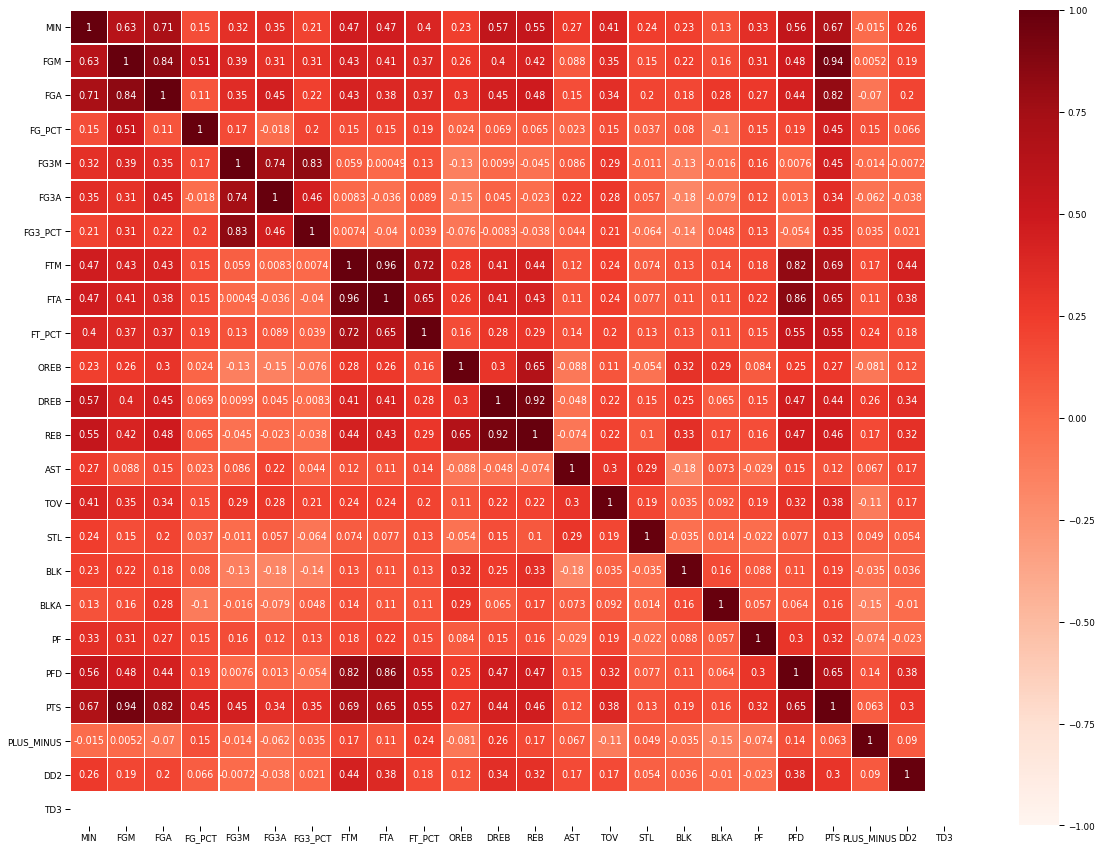

In [27]:
plotSize = (20,15)
# import seaborn as sns
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)

# sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
print("")
print("Pre Season")
sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

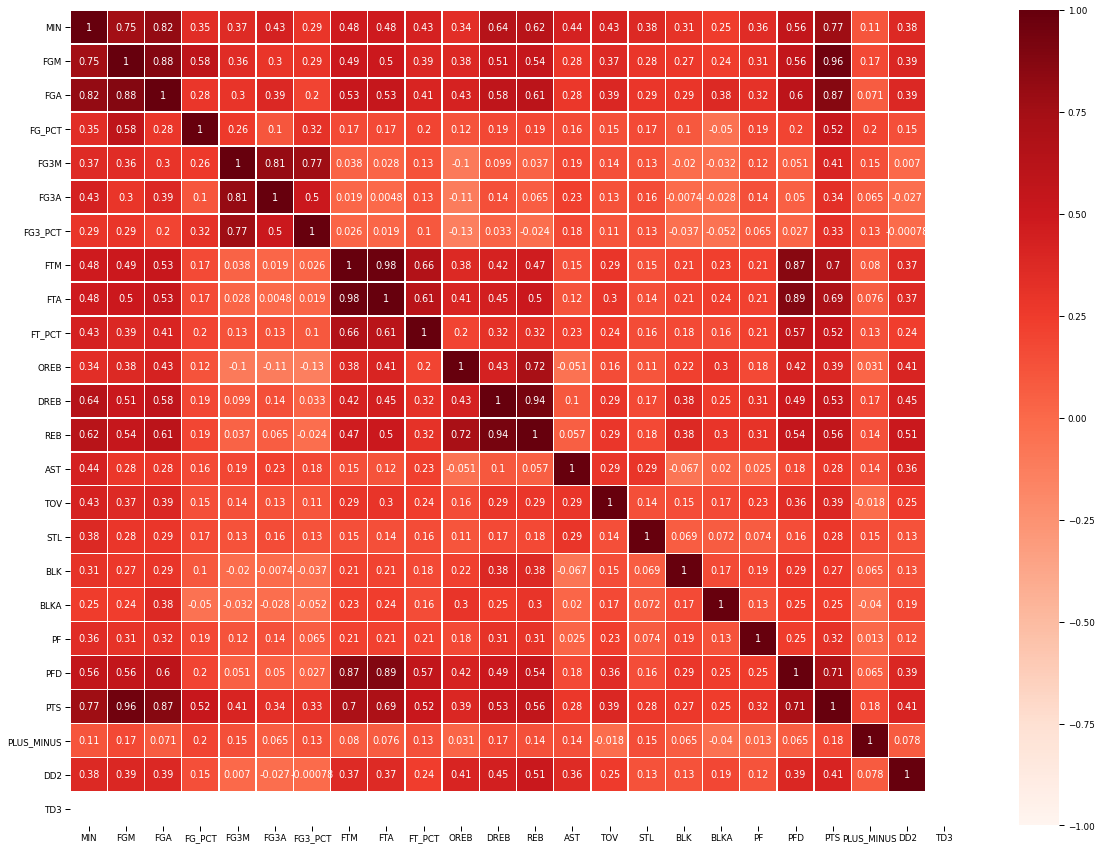

In [28]:
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)



Playoffs


<AxesSubplot:>

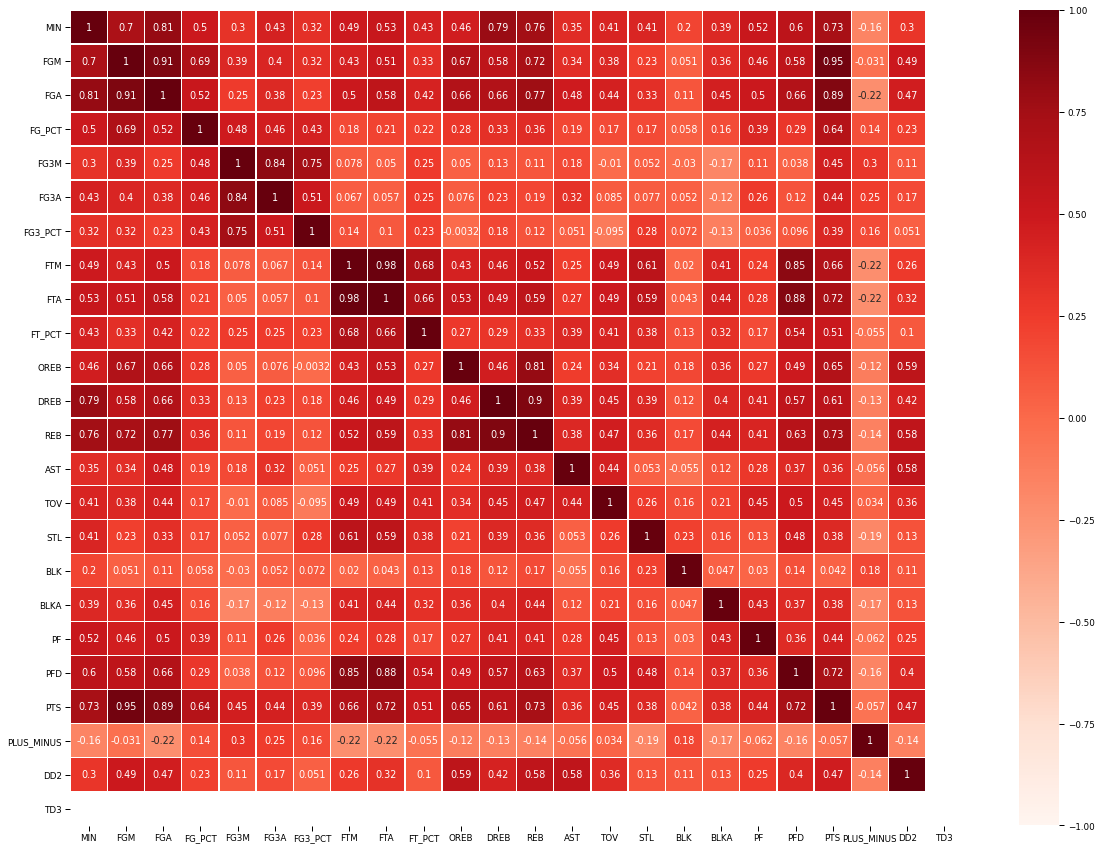

In [29]:
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)
print("")
print("Playoffs")
sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_Playoffs)

## Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix

### Note: Adjust features to remove after analyzing the matrices

In [30]:
## Analysis of heat maps
### Removed anything over 0.8
#### PTS, FGA, FG3M, FTM, PFD, REB


### 2005-2020 TOR

### Preseason
#### FGM or PTS
#### FGA vs PTS
#### FGM or FGA
#### FTM vs FTA
#### PFD vs FTM FTA
#### REB vs DREB

### Reg Season
#### FGM vs PTS
#### FGA vs PTS
#### FGM vs FGA
#### FGA vs MIN
#### FG3A vs FG3M
#### FTM vs FTA
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


### Playoffs
#### FGM vs FGA
#### FGM vs PTS
#### FGA vs PTS
#### FGA vs MIN
#### FTA vs FTM
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


In [31]:
# Remove unwanted/useless features. anything over 80% was removed
# unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']
unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']

for gameType in gameTypeListed_code:
    if gameType == 0:
        df_X_PreSeason = df_X_PreSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 1:
        df_X_RegularSeason = df_X_RegularSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 2:
        df_X_Playoffs = df_X_Playoffs.drop(unwanted_list_02, axis=1)


# Remaining features and after removal of unwanted features in the dataframes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)
    display(df_X_PreSeason)
    display(df_X_RegularSeason)
    display(df_X_Playoffs)    

['MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type',
 'PIE',
 'PER',
 'SEASON_YEAR_code']

,MIN,FGM,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PLUS_MINUS,DD2,TD3,PIE,PER
4,20.666667,5,0.556,0,0.0,2,0.5,0,5,2,0,1,0,0,4,23,0,0,9.21659,20.692
10,4.566667,2,0.667,2,0.5,0,0.0,0,1,0,0,0,0,0,1,10,0,0,3.68664,39.8365
11,5.450000,1,1.000,0,0.0,3,1.0,0,1,0,0,0,0,0,0,11,0,0,5.52995,44.2481
13,18.700000,2,0.333,2,0.5,0,0.0,0,4,3,0,1,0,0,0,19,0,0,8.29493,15.1643
14,19.833333,1,0.250,0,0.0,0,0.0,1,3,0,1,1,0,1,1,2,0,0,1.38249,1.73834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,20.983333,4,0.667,3,1.0,2,0.5,0,2,5,3,2,0,0,4,-2,0,0,11,25.1386
31642,26.450000,4,0.800,2,1.0,0,0.0,0,3,1,2,0,0,0,3,6,0,0,8,12.3798
31652,22.966667,5,0.500,0,0.0,6,0.5,2,4,1,1,1,1,0,2,-3,0,0,9.5,21.3609
31672,27.533333,4,0.500,4,0.5,0,0.0,1,8,4,1,1,1,1,3,8,0,0,16,20.8335


,MIN,FGM,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PLUS_MINUS,DD2,TD3,PIE,PER
2613,18.316667,7,0.778,1,1.00,3,1.0,0,0,3,2,4,0,0,0,3,0,0,30.6569,50.6155
2668,15.233333,3,0.375,1,0.00,2,1.0,2,4,2,2,0,1,0,2,6,0,0,9.48905,17.0074
2688,20.683333,5,0.455,4,0.25,2,1.0,0,1,0,1,1,1,1,4,-10,0,0,6.56934,15.7159
2747,15.133333,1,0.500,0,0.00,0,0.0,0,1,2,0,0,0,0,3,5,0,0,1.45985,5.23738
2765,13.603333,3,0.500,0,0.00,0,0.0,0,1,0,0,0,0,0,0,-4,0,0,5.83942,11.3845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,34.116667,7,0.467,1,0.00,3,1.0,2,6,4,2,0,1,0,5,0,0,0,17.6471,16.9782
56380,32.695000,5,0.556,5,0.60,0,0.0,0,2,7,1,1,0,2,5,4,0,0,16.9935,18.7902
56423,8.750000,2,0.286,0,0.00,0,0.0,2,0,0,0,0,0,2,2,2,0,0,-2.61438,2.27451
56433,37.683333,3,0.273,5,0.60,0,0.0,0,1,3,0,2,0,1,2,11,0,0,6.53595,7.73989


,MIN,FGM,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PLUS_MINUS,DD2,TD3,PIE,PER
28590,39.111667,7,0.368,0,0.000,4,0.500,4,5,3,0,1,0,1,3,-14,0,0,14.0845,13.3285
28595,15.916667,2,0.500,2,0.000,0,0.000,0,1,2,0,1,0,0,3,-5,0,0,4.22535,11.3011
28602,24.283333,6,0.429,2,0.000,2,1.000,1,4,5,4,2,0,0,2,-7,0,0,16.1972,17.4972
28603,8.888333,0,0.000,0,0.000,0,0.000,0,2,0,1,0,0,0,3,4,0,0,-2.8169,-8.5511
28622,43.983333,3,0.375,3,0.333,4,1.000,0,4,2,0,1,0,0,2,-15,0,0,15.493,10.2004
28623,24.433333,3,0.500,2,1.000,0,0.000,2,2,0,0,2,1,0,1,0,0,0,13.3803,19.6976
28625,29.216667,3,0.273,5,0.400,6,1.000,2,5,2,0,2,0,2,3,-4,0,0,18.3099,20.7531
28629,30.450000,6,0.462,4,0.250,1,0.000,0,2,2,0,0,0,0,2,-6,0,0,9.85915,11.0744
28639,23.716667,5,0.500,4,0.500,0,0.000,0,3,4,1,0,0,0,5,-3,0,0,11.2676,16.0299
28739,0.550000,0,0.000,0,0.000,0,0.000,0,0,0,0,1,0,0,0,0,0,0,1.35135,97.9945


## Section 5.3: Re-check Heat Map / Correlation Matrix

This is only a check but not necessary.


Pre Season


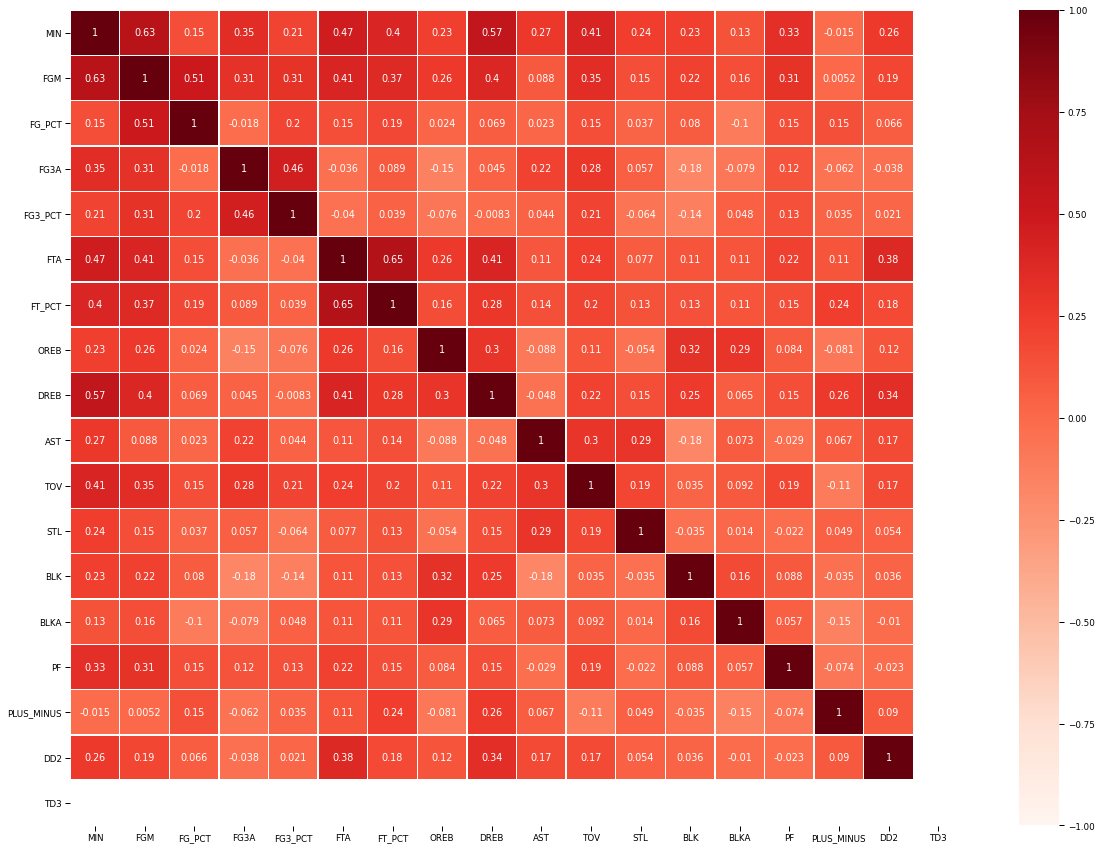

In [32]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Pre Season")
    sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_PreSeason)



Regular Season


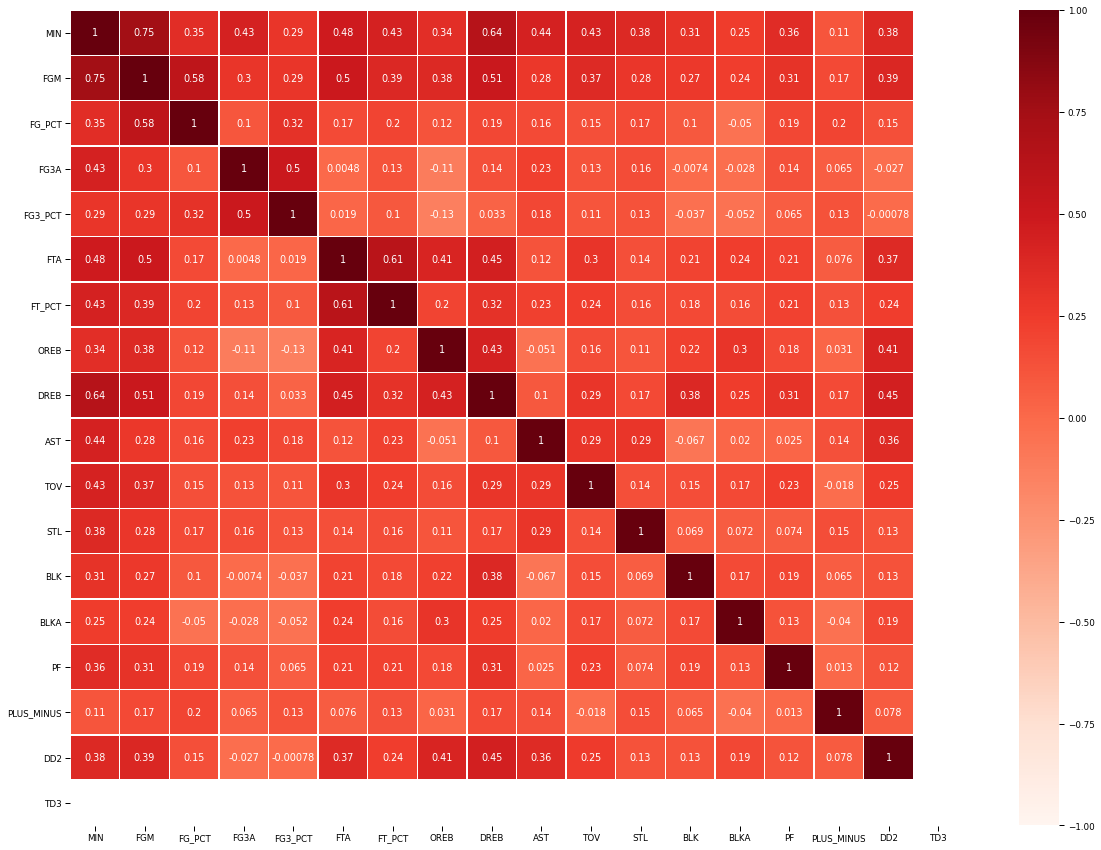

In [33]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Regular Season")
    sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_RegularSeason)


Playoffs


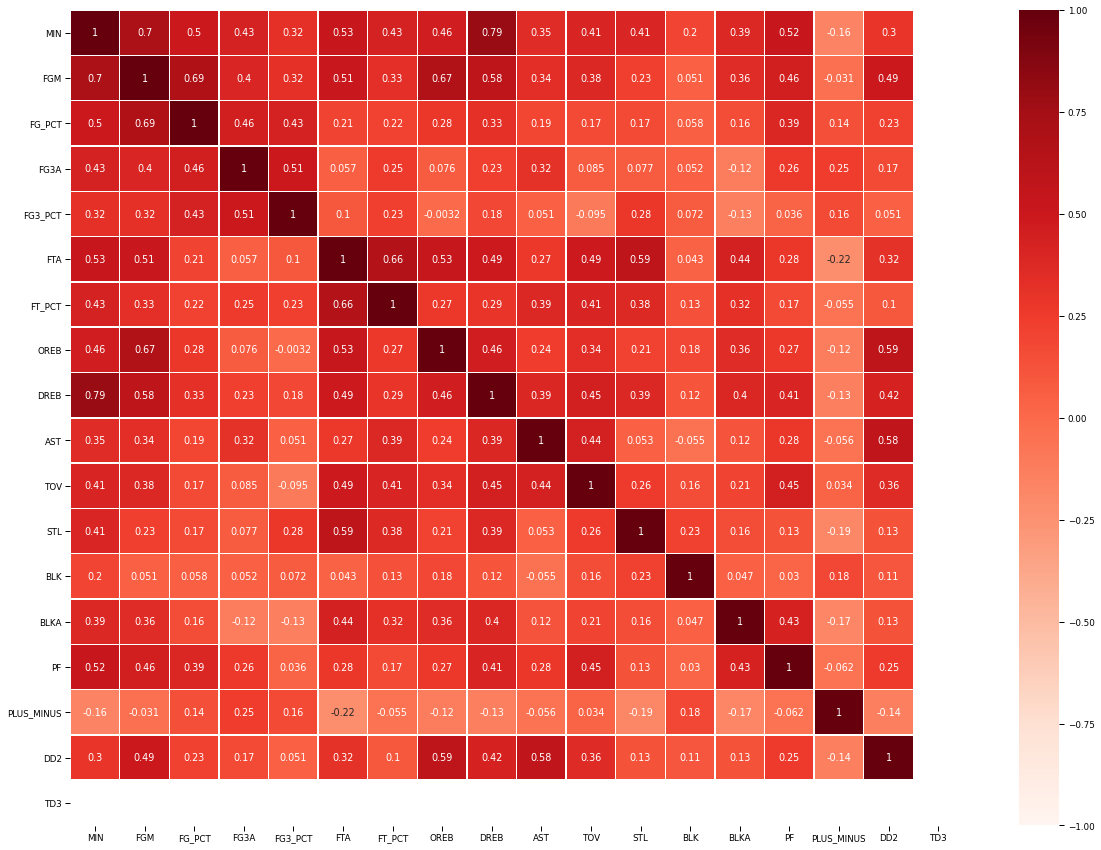

In [34]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Playoffs")
    sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_Playoffs)

# Section 6: Modeling and Analysis

## Section 6.1: Prepare train and test data

In [35]:
# Select a season 
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]

if gameTypeToProcess == 0:
    X = df_X_PreSeason
    Y = df_Y_PreSeason
elif gameTypeToProcess == 1:
    X = df_X_RegularSeason
    Y = df_Y_RegularSeason
elif gameTypeToProcess == 2:
    X = df_X_Playoffs
    Y = df_Y_Playoffs

# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

selectedSeasonRecordCount = X_train.shape[0] + X_test.shape[0]

# VALIDATION CODE 
if debug_active == 'yes':
    # Validate the split at a high level
    print(X_train.shape,Y_train.shape)
    print(X_test.shape,Y_test.shape)
    print('Season Type: ', gameTypeToProcess)
    df_Encoded.to_csv('DAT205_Output_All.csv') 
    X_train.to_csv('DAT205_Output_Split_X_train.csv') 
    X_test.to_csv('DAT205_Output_Split_X_test.csv') 
    Y_train.to_csv('DAT205_Output_Split_Y_train.csv') 
    Y_test.to_csv('DAT205_Output_Split_Y_test.csv') 
    display(X_train)
    display(Y_train)


(1185, 20) (1185, 1)
(509, 20) (509, 1)
Season Type:  1


,MIN,FGM,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PLUS_MINUS,DD2,TD3,PIE,PER
24376,25.533333,6,0.600,2,0.000,2,1.000,0,1,6,2,1,0,0,2,-3,0,0,16.568,22.9862
5233,14.733333,2,0.333,4,0.250,1,1.000,2,2,0,2,1,0,1,2,-15,0,0,2.36686,9.04147
33332,35.000000,6,0.545,5,0.600,1,1.000,0,2,13,2,3,2,1,1,-2,1,0,26.8657,31.9127
42089,33.450000,1,0.111,2,0.000,0,0.000,0,3,6,3,1,0,1,2,-24,0,0,-1.5625,-3.51477
53606,19.188333,2,0.500,1,0.000,5,0.800,0,5,4,0,1,2,0,0,9,0,0,14.0969,31.5426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40189,25.950000,7,0.583,0,0.000,6,0.833,4,3,1,1,0,0,0,1,-14,0,0,21.3836,30.2135
45048,34.115000,3,0.333,2,0.000,5,1.000,0,5,1,1,1,1,0,2,4,0,0,11.0465,10.8418
27265,12.250000,2,0.500,0,0.000,0,0.000,1,1,0,1,0,0,0,0,-2,0,0,2.63158,7.62776
49416,35.523333,3,0.214,7,0.143,0,0.000,0,1,3,0,0,0,0,0,-5,0,0,0,-0.0806512


,WL
24376,0
5233,1
33332,0
42089,0
53606,1
...,...
40189,0
45048,0
27265,1
49416,0


In [36]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(X)
    display(Y)

,MIN,FGM,FG_PCT,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,TOV,STL,BLK,BLKA,PF,PLUS_MINUS,DD2,TD3,PIE,PER
2613,18.316667,7,0.778,1,1.00,3,1.0,0,0,3,2,4,0,0,0,3,0,0,30.6569,50.6155
2668,15.233333,3,0.375,1,0.00,2,1.0,2,4,2,2,0,1,0,2,6,0,0,9.48905,17.0074
2688,20.683333,5,0.455,4,0.25,2,1.0,0,1,0,1,1,1,1,4,-10,0,0,6.56934,15.7159
2747,15.133333,1,0.500,0,0.00,0,0.0,0,1,2,0,0,0,0,3,5,0,0,1.45985,5.23738
2765,13.603333,3,0.500,0,0.00,0,0.0,0,1,0,0,0,0,0,0,-4,0,0,5.83942,11.3845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376,34.116667,7,0.467,1,0.00,3,1.0,2,6,4,2,0,1,0,5,0,0,0,17.6471,16.9782
56380,32.695000,5,0.556,5,0.60,0,0.0,0,2,7,1,1,0,2,5,4,0,0,16.9935,18.7902
56423,8.750000,2,0.286,0,0.00,0,0.0,2,0,0,0,0,0,2,2,2,0,0,-2.61438,2.27451
56433,37.683333,3,0.273,5,0.60,0,0.0,0,1,3,0,2,0,1,2,11,0,0,6.53595,7.73989


,WL
2613,0
2668,0
2688,0
2747,0
2765,0
...,...
56376,1
56380,1
56423,1
56433,1


## Section 6.2: Apply Logistic Regression on the split train/test dataset

In [37]:
# np.isnan(df_Encoded.any())
# np.isfinite(df_Encoded.all())

# np.any(np.isnan(df_Encoded))
# np.all(np.isfinite(df_Encoded))

In [38]:
# Notes
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

# Create the model
LogRegM = LogisticRegression(C=1, solver='liblinear', random_state = random_state_val)

# Train the model
LogRegM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = LogRegM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_LogRegM.csv') 

# Y_pred = pd.DataFrame(Y_pred, columns = ["WL_code"])
# df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)
    display(df_Y_pred)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

,Y_pred
0,0
1,1
2,1
3,0
4,1
...,...
504,0
505,0
506,0
507,0


## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [39]:
accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM = f1_score(Y_test, Y_pred)
recall_score_LogRegM = recall_score(Y_test, Y_pred)
precision_score_LogRegM = precision_score(Y_test, Y_pred)
classification_report_LogRegM = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM
sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])


# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
    print('F1 score:', numFormat.format(f1_score_LogRegM))
    print('Recall:', numFormat.format(recall_score_LogRegM))
    print('Precision:', numFormat.format(precision_score_LogRegM))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
    print('Specificity : ', numFormat.format(specificity_LogRegM))
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

Accuracy: 0.7505
F1 score: 0.7067
Recall: 0.6830
Precision: 0.7321
Sensitivity :  0.8035
Specificity :  0.6830

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       285
           1       0.73      0.68      0.71       224

    accuracy                           0.75       509
   macro avg       0.75      0.74      0.74       509
weighted avg       0.75      0.75      0.75       509


 confussion matrix:
 [[229  56]
 [ 71 153]]


In [40]:
# Feature Importance
importance = LogRegM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LogRegM

## Section 6.3:  Apply Decision Tree Classifier on the split train/test dataset



In [41]:
# Create the model
DTM = DecisionTreeClassifier()

# Train the model
DTM.fit(X_train, Y_train)

# Predict using test data
Y_pred = DTM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_DTM.csv') 

In [42]:
accuracy_score_DTM = accuracy_score(Y_test, Y_pred)
f1_score_DTM = f1_score(Y_test, Y_pred)
recall_score_DTM = recall_score(Y_test, Y_pred)
precision_score_DTM = precision_score(Y_test, Y_pred)
classification_report_DTM = classification_report(Y_test, Y_pred)
confusion_matrix_DTM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_DTM
sensitivity_DTM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_DTM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_DTM))
    print('F1 score:', numFormat.format(f1_score_DTM))
    print('Recall:', numFormat.format(recall_score_DTM))
    print('Precision:', numFormat.format(precision_score_DTM))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM))
    print('Specificity : ', numFormat.format(specificity_DTM))
    print('\n clasification report:\n', classification_report_DTM)
    print('\n confussion matrix:\n',confusion_matrix_DTM)

Accuracy: 0.6699
F1 score: 0.6395
Recall: 0.6652
Precision: 0.6157
Sensitivity :  0.6737
Specificity :  0.6652

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       285
           1       0.62      0.67      0.64       224

    accuracy                           0.67       509
   macro avg       0.67      0.67      0.67       509
weighted avg       0.67      0.67      0.67       509


 confussion matrix:
 [[192  93]
 [ 75 149]]


In [43]:
# Feature Importance
importance = DTM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_DTM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_DTM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_DTM

## Section 6.4: Apply Random Forest Classifier on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Create the model
RFM = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model
RFM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = RFM.predict(X_test)
df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_RFM.csv') 

In [46]:
accuracy_score_RFM = accuracy_score(Y_test, Y_pred)
f1_score_RFM = f1_score(Y_test, Y_pred)
recall_score_RFM = recall_score(Y_test, Y_pred)
precision_score_RFM = precision_score(Y_test, Y_pred)
classification_report_RFM = classification_report(Y_test, Y_pred)
confusion_matrix_RFM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_RFM
sensitivity_RFM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_RFM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_RFM))
    print('F1 score:', numFormat.format(f1_score_RFM))
    print('Recall:', numFormat.format(recall_score_RFM))
    print('Precision:', numFormat.format(precision_score_RFM))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM))
    print('Specificity : ', numFormat.format(specificity_RFM))
    print('\n clasification report:\n', classification_report_RFM)
    print('\n confussion matrix:\n',confusion_matrix_RFM)

Accuracy: 0.7210
F1 score: 0.6283
Recall: 0.5357
Precision: 0.7595
Sensitivity :  0.8667
Specificity :  0.5357

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       285
           1       0.76      0.54      0.63       224

    accuracy                           0.72       509
   macro avg       0.73      0.70      0.70       509
weighted avg       0.73      0.72      0.71       509


 confussion matrix:
 [[247  38]
 [104 120]]


In [47]:
# Feature Importance
importance = RFM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_RFM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_RFM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_RFM

# Section 7: Cross Validation Scores

In [48]:
seed = random_state_val
# seed = 0

loan_models = []
# loan_models.append(('Logistic Regression', LogisticRegression()))
loan_models.append(('Decision Tree', DecisionTreeClassifier()))
# loan_models.append(('KNN', KNeighborsClassifier()))
# loan_models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
# loan_models.append(('Gaussian', GaussianNB()))
# loan_models.append(('SVM', SVC()))
loan_models.append(('Random Forest', RandomForestClassifier()))

cross_val_scores = []
model_keys = []

df_cross_val_score = []
df_cross_val_score_headers = [0,1,2,3]
df_cross_val_score = pd.DataFrame (df_cross_val_score, columns = df_cross_val_score_headers)

# VALIDATION CODE 
# if debug_active == 'yes':
#     nullFieldAnalysis(df_cross_val_score)

df_Addscore = []
scoring = 'accuracy'
for model_key, loan_model in loan_models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cross_val_score = model_selection.cross_val_score(loan_model, X_train, Y_train.values.ravel(), cv=kfold, scoring=scoring)
    cross_val_scores.append(cross_val_score)
    model_keys.append(model_key)
    msg = "%s: cross val mean -> %f , cross val std -> %f, kfold variance -> %f" % (model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var())
    df_Addscore = pd.Series([model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var()])
    df_cross_val_score = df_cross_val_score.append(df_Addscore, ignore_index=True)
    print(msg)

df_cross_val_score.columns = ['Model_Key','Cross_Value_Score_Mean','Cross_Value_Score_STD','Cross_Value_Score_Var']
# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("VALIDATION RESULT")
    display(df_cross_val_score)
    print(model_keys)
    print(cross_val_scores)

Decision Tree: cross val mean -> 0.691155 , cross val std -> 0.048442, kfold variance -> 0.002347
Random Forest: cross val mean -> 0.734219 , cross val std -> 0.041826, kfold variance -> 0.001749

VALIDATION RESULT


,Model_Key,Cross_Value_Score_Mean,Cross_Value_Score_STD,Cross_Value_Score_Var
0,Decision Tree,0.691155,0.048442,0.002347
1,Random Forest,0.734219,0.041826,0.001749


['Decision Tree', 'Random Forest']
[array([0.72268908, 0.65546218, 0.71428571, 0.62184874, 0.72268908,
       0.73728814, 0.62711864, 0.69491525, 0.6440678 , 0.77118644]), array([0.72268908, 0.71428571, 0.75630252, 0.66386555, 0.76470588,
       0.77966102, 0.71186441, 0.72033898, 0.69491525, 0.81355932])]


In [49]:
# # WORK IN PROGRESS

# # boxplot algorithm comparison

# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# # sns.boxplot(x = model_keys, y=cross_val_scores, palette = 'Blues')
# # plt.show()

# # plt.style.use('ggplot')
# plotX = pd.Series(model_keys)
# plotY = pd.Series(cross_val_scores)

# df = pd.DataFrame({"model_keys" : plotX, "cross_val_scores" : plotY})
# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# sns.set(style="whitegrid")
# sns.boxplot(data=df, palette = 'Blues')



# # plt.style.use('ggplot')
# # dummyData.groupby(['quarter', 'brand'])\
# #       .brand.count().unstack().plot.bar(legend=True)
# plt.show()

In [50]:
# TEST CODE

# print(model_keys)
# print(cross_val_scores)


# print(plotX)
# print(plotY)

# Section 8: Summary Report

In [51]:
# Create summary table of metric analysis
df_Metrics = []

df_Metrics_headers = [0,1,2,3,4,5,6]
df_Metrics = pd.DataFrame (df_Metrics, columns = df_Metrics_headers)


df_AddModel = pd.Series(['Decision Tree',accuracy_score_DTM,f1_score_DTM,recall_score_DTM,precision_score_DTM,sensitivity_DTM,specificity_DTM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['K Nearest Neighbors',accuracy_score_KNNM,f1_score_KNNM,recall_score_KNNM,precision_score_KNNM,sensitivity_KNNM,specificity_KNNM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['Linear Discriminant Analysis',accuracy_score_LDAM,f1_score_LDAM,recall_score_LDAM,precision_score_LDAM,sensitivity_LDAM,specificity_LDAM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['Gaussian Naive Bayes',accuracy_score_GNBM,f1_score_GNBM,recall_score_GNBM,precision_score_GNBM,sensitivity_GNBM,specificity_GNBM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['SVM',accuracy_score_SVMM,f1_score_SVMM,recall_score_SVMM,precision_score_SVMM,sensitivity_SVMM,specificity_SVMM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Random Forest',accuracy_score_RFM,f1_score_RFM,recall_score_RFM,precision_score_RFM,sensitivity_RFM,specificity_RFM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Logistic Regression', accuracy_score_LogRegM,f1_score_LogRegM,recall_score_LogRegM,precision_score_LogRegM,sensitivity_LogRegM,specificity_LogRegM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_Metrics.columns = ['Model','Accuracy','F1 score','Recall','Precision','Sensitivity','Specificity']

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Metrics)

# Join dataframes for Metrics and cross_val_scores
df_Summary = pd.concat([df_Metrics,df_cross_val_score], axis=1)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)

,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity
0,Decision Tree,0.669941,0.639485,0.665179,0.615702,0.673684,0.665179
1,Random Forest,0.721022,0.628272,0.535714,0.759494,0.866667,0.535714
2,Logistic Regression,0.750491,0.706697,0.683036,0.732057,0.803509,0.683036


,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity,Model_Key,Cross_Value_Score_Mean,Cross_Value_Score_STD,Cross_Value_Score_Var
0,Decision Tree,0.669941,0.639485,0.665179,0.615702,0.673684,0.665179,Decision Tree,0.691155,0.048442,0.002347
1,Random Forest,0.721022,0.628272,0.535714,0.759494,0.866667,0.535714,Random Forest,0.734219,0.041826,0.001749
2,Logistic Regression,0.750491,0.706697,0.683036,0.732057,0.803509,0.683036,NaN,NaN,NaN,NaN


In [52]:
# Clean up columns by dropping columns of duplicate data (Model_Key)
df_Summary.drop(['Model_Key'], axis=1, inplace=True)
# df_Summary.drop(columns=['Model_Key'], inplace=True)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)


,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity,Cross_Value_Score_Mean,Cross_Value_Score_STD,Cross_Value_Score_Var
0,Decision Tree,0.669941,0.639485,0.665179,0.615702,0.673684,0.665179,0.691155,0.048442,0.002347
1,Random Forest,0.721022,0.628272,0.535714,0.759494,0.866667,0.535714,0.734219,0.041826,0.001749
2,Logistic Regression,0.750491,0.706697,0.683036,0.732057,0.803509,0.683036,NaN,NaN,NaN


In [53]:
print("================= Results Summary ==================\n")

print("\n==================== Configuration ======================")
print('Filter by Team Selected = ', teamSelected)

print('Total Number of Records (Initial Dataset) = ', totalNumRec)
print('Total Number of Records (Transformed and Filtered Dataset) = ', df_TF.shape[0])
print('Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) = ', gameTypeToProcess)
print('Selected Season Records = ', selectedSeasonRecordCount)
print('Train / Test Split = ', test_size_val)
print('Model random_state_val = ', random_state_val)

print("\n==================== Features ======================")
print('----------------- Removed Features -----------------')
display(unwanted_list_01)
print('\n------ Removed attributes - Heat Map / Correlation Matrix ---- ')
display(unwanted_list_02)

print('\n------------------- Applied Features --------------------')
display(X_test.columns.tolist())

print("\n ================= Model Analysis Summary ==================\n")
display(df_Summary)

print('\n\n----------------- Logistic Regression --------------------')
print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
print('F1 score:', numFormat.format(f1_score_LogRegM))
print('Recall:', numFormat.format(recall_score_LogRegM))
print('Precision:', numFormat.format(precision_score_LogRegM))
print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
print('Specificity : ', numFormat.format(specificity_LogRegM))

print('\n clasification report:\n', classification_report_LogRegM)
print('\n confussion matrix:\n',confusion_matrix_LogRegM)
print("\nFeature Importance")
display(df_feature_importance_LogRegM)

print('\n\n-------------------- Decision Tree -----------------------\n')
print('Accuracy:', numFormat.format(accuracy_score_DTM))
print('F1 score:', numFormat.format(f1_score_DTM))
print('Recall:', numFormat.format(recall_score_DTM))
print('Precision:', numFormat.format(precision_score_DTM))
print('Sensitivity : ', numFormat.format(sensitivity_DTM))
print('Specificity : ', numFormat.format(specificity_DTM))

print('\n clasification report:\n', classification_report_DTM)
print('\n confussion matrix:\n',confusion_matrix_DTM)
print("\nFeature Importance")
display(df_feature_importance_DTM)

# print('\n\n------------- Linear Discriminant Analysis ---------------\n')
# print('\n clasification report:\n', classification_report_LDAM)
# print('\n confussion matrix:\n',confusion_matrix_LDAM)
# print("\nFeature Importance")
# display(df_feature_importance_LDAM)

print('\n\n-------------------- Random Forest -----------------------\n')
print('Accuracy:', numFormat.format(accuracy_score_RFM))
print('F1 score:', numFormat.format(f1_score_RFM))
print('Recall:', numFormat.format(recall_score_RFM))
print('Precision:', numFormat.format(precision_score_RFM))
print('Sensitivity : ', numFormat.format(sensitivity_RFM))
print('Specificity : ', numFormat.format(specificity_RFM))

print('\n clasification report:\n', classification_report_RFM)
print('\n confussion matrix:\n',confusion_matrix_RFM)
print("\nFeature Importance")
display(df_feature_importance_RFM)



================= Results Summary ==================


==================== Configuration ======================
Filter by Team Selected =  TOR
Total Number of Records (Initial Dataset) =  58288
Total Number of Records (Transformed and Filtered Dataset) =  1903
Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) =  1
Selected Season Records =  1694
Train / Test Split =  0.3
Model random_state_val =  42

==================== Features ======================
----------------- Removed Features -----------------


['PLAYER_ID',
 'TEAM_ID',
 'PLAYER_NAME',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'UID_STG']


------ Removed attributes - Heat Map / Correlation Matrix ---- 


['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']


------------------- Applied Features --------------------


['MIN',
 'FGM',
 'FG_PCT',
 'FG3A',
 'FG3_PCT',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'PIE',
 'PER']


 ================= Model Analysis Summary ==================



,Model,Accuracy,F1 score,Recall,Precision,Sensitivity,Specificity,Cross_Value_Score_Mean,Cross_Value_Score_STD,Cross_Value_Score_Var
0,Decision Tree,0.669941,0.639485,0.665179,0.615702,0.673684,0.665179,0.691155,0.048442,0.002347
1,Random Forest,0.721022,0.628272,0.535714,0.759494,0.866667,0.535714,0.734219,0.041826,0.001749
2,Logistic Regression,0.750491,0.706697,0.683036,0.732057,0.803509,0.683036,NaN,NaN,NaN




----------------- Logistic Regression --------------------
Accuracy: 0.7505
F1 score: 0.7067
Recall: 0.6830
Precision: 0.7321
Sensitivity :  0.8035
Specificity :  0.6830

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       285
           1       0.73      0.68      0.71       224

    accuracy                           0.75       509
   macro avg       0.75      0.74      0.74       509
weighted avg       0.75      0.75      0.75       509


 confussion matrix:
 [[229  56]
 [ 71 153]]

Feature Importance


,Feature,Feature Importance
2,FG_PCT,0.870237
4,FG3_PCT,0.783798
6,FT_PCT,0.362610
12,BLK,0.318313
1,FGM,0.249021
11,STL,0.228757
8,DREB,0.200839
9,AST,0.195645
15,PLUS_MINUS,0.158901
5,FTA,0.091770




-------------------- Decision Tree -----------------------

Accuracy: 0.6699
F1 score: 0.6395
Recall: 0.6652
Precision: 0.6157
Sensitivity :  0.6737
Specificity :  0.6652

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       285
           1       0.62      0.67      0.64       224

    accuracy                           0.67       509
   macro avg       0.67      0.67      0.67       509
weighted avg       0.67      0.67      0.67       509


 confussion matrix:
 [[192  93]
 [ 75 149]]

Feature Importance


,Feature,Feature Importance
15,PLUS_MINUS,0.365887
0,MIN,0.125284
18,PIE,0.104140
19,PER,0.079050
8,DREB,0.035495
14,PF,0.034955
3,FG3A,0.032792
1,FGM,0.032438
9,AST,0.031301
4,FG3_PCT,0.029523




-------------------- Random Forest -----------------------

Accuracy: 0.7210
F1 score: 0.6283
Recall: 0.5357
Precision: 0.7595
Sensitivity :  0.8667
Specificity :  0.5357

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       285
           1       0.76      0.54      0.63       224

    accuracy                           0.72       509
   macro avg       0.73      0.70      0.70       509
weighted avg       0.73      0.72      0.71       509


 confussion matrix:
 [[247  38]
 [104 120]]

Feature Importance


,Feature,Feature Importance
15,PLUS_MINUS,0.378020
2,FG_PCT,0.148205
19,PER,0.119819
18,PIE,0.102389
0,MIN,0.042935
8,DREB,0.035008
4,FG3_PCT,0.030645
5,FTA,0.027429
12,BLK,0.027102
1,FGM,0.019272


In [54]:
time_took = time.time() - start_time
print("")
print("")
print("PROCESSING COMPLETE")
print(f"Total Runtime: {hms_string(time_took)}")
if dataEnhancement_active == 'yes':
    print(f"Add Enhancement Columns Runtime: {hms_string(time_took01)}")
    print(f"Create temp TeamGameStats dataframe Runtime: {hms_string(time_took02)}")
    print(f"Calculate PIE / PER Runtime: {hms_string(time_took03)}")
    # print(f"Calculate PER Runtime: {hms_string(time_took04)}")



PROCESSING COMPLETE
Total Runtime: 0:03:36.20
Add Enhancement Columns Runtime: 0:00:20.88
Create temp TeamGameStats dataframe Runtime: 0:00:56.81
Calculate PIE Runtime: 0:01:54.97


NameError: name 'time_took04' is not defined

# End of Code